In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/ndeepak/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
arch=resnet34
PATH = "/home/ndeepak/data/dog-breed-identification/"
sz=224

In [4]:
cd {PATH}

/home/ndeepak/data/dog-breed-identification


In [5]:
#!kaggle competitions download -c dog-breed-identification
os.listdir(PATH)
#!unzip '*.zip'
#!rm *.zip

['train',
 'sample_submission.csv',
 'labels.csv',
 'assignment1.ipynb',
 'tmp',
 'models',
 '.ipynb_checkpoints',
 'test']

In [6]:
files = os.listdir(f'{PATH}train')[:5]
files

['ec1654e55864cef34ec43800744f8ac2.jpg',
 'f52a0aaff41a517be216bf41c967a751.jpg',
 '6b8ac349a4550590b06c83996ed714e8.jpg',
 '96a7a15ba427e697067d62c8cef5a23a.jpg',
 '593d494b3c91921a8c6db19d00b8b4f1.jpg']

In [7]:
labels = f'{PATH}labels.csv'
validation_size = int(len(list(open(labels)))*0.15)
validation_indexes = get_cv_idxs(validation_size)

In [8]:
data = ImageClassifierData.from_csv(PATH, 'train', labels, val_idxs=validation_indexes, test_name = 'test', suffix='.jpg', tfms=tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1))

In [9]:
training = ConvLearner.pretrained(arch, data, precompute=True)

In [10]:
training.fit(0.01, 25)

epoch      trn_loss   val_loss   accuracy   
    0      1.75911    0.876303   0.797386  
    1      0.929008   0.589691   0.830065  
    2      0.704204   0.522052   0.830065  
    3      0.61922    0.456863   0.859477  
    4      0.535755   0.462906   0.836601  
    5      0.488828   0.434104   0.849673  
    6      0.453806   0.438042   0.846405  
    7      0.418028   0.436962   0.852941  
    8      0.388462   0.424453   0.852941  
    9      0.362814   0.407669   0.859477  
    10     0.351617   0.422628   0.852941  
    11     0.320896   0.414272   0.852941  
    12     0.296315   0.433896   0.843137  
    13     0.291057   0.44       0.846405  
    14     0.274406   0.440238   0.849673  
    15     0.26404    0.439102   0.869281  
    16     0.254685   0.431404   0.869281  
    17     0.243037   0.452217   0.859477  
    18     0.223523   0.434032   0.862745  
    19     0.22633    0.431252   0.866013  
    20     0.20934    0.448204   0.856209  
    21     0.211253   0.436237 

[array([0.44024]), 0.8562091491580789]

In [11]:
lrf = training.lr_find()

 79%|███████▉  | 123/155 [00:01<00:00, 56.56it/s, loss=0.352]


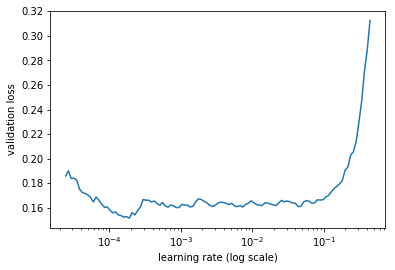

In [12]:
training.sched.plot()

Based on the graph, we can see the learning rate of 0.01 is okay.

In [13]:
training.save('dog-breed')

In [15]:
training.load('dog-breed')
log_preds, y = training.predict_with_targs(is_test=True)
log_preds.shape

(10357, 120)

In [19]:
df = pd.DataFrame(np.exp(log_preds))
df.columns = [c for c in data.classes]
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])
SUBM = os.path.join(PATH,'out/')
os.makedirs(SUBM)
df.to_csv(f'{SUBM}dog-breed.gz', compression='gzip', index=False)

![title](kaggle_submission.png)